# Valutazione dell'inquinamento milanese dal 2008 al 2018
Iniziamo con l'importazione di moduli che ci saranno utili per studiare il comportamento dei dati:

In [1]:
import csv as csv
import math as math
import matplotlib.pyplot as plt
from minepy import MINE
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss 
from sklearn import preprocessing
from tqdm.auto import tqdm
from warnings import simplefilter

## Osservazione dei dati
E' fondamentale capire la natura dei dati. Il csv sottostante è stato creato unendo due database differenti: uno con lo scopo di riportare il dato sull'inquinamento, l'altro con l'utilità di mostrare se il valore giornaliero per il dato inquinante è buono (G(ood)) o cattivo (B(ad)). Quindi procediamo col vedere come si presentano i dati in forma cruda...

In [2]:
simplefilter(action='ignore', category=FutureWarning)
with open("tutti10anni.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    next(csv_reader)
    
    for lines in csv_reader:
      print(lines)

['01/01/2008', '134', '191.6666667', '3.875', '14', '1.5', '8', '101', 'B']
['02/01/2008', '141', '144', '3.5', '31', '1.5', '2.5', '133', 'B']
['03/01/2008', '62.33333333', '78.4', '2.433333333', '18.33333333', '', '2.5', '48', 'B']
['04/01/2008', '38.66666667', '85.57142857', '1.875', '25.66666667', '1.5', '2.5', '33', 'G']
['05/01/2008', '42', '128.1428571', '2.68', '11.33333333', '4', '2.5', '41', 'G']
['06/01/2008', '42', '95.14285714', '2.3', '11', '3', '2.5', '36', 'G']
['07/01/2008', '30', '74', '1.98', '17.66666667', '1.5', '2.5', '25', 'G']
['08/01/2008', '58.33333333', '99.42857143', '2.32', '12.66666667', '4', '2.5', '38', 'B']
['09/01/2008', '55.33333333', '102.625', '2.14', '13', '3', '2.5', '41', 'B']
['10/01/2008', '52', '87.14285714', '1.82', '11.66666667', '4', '6', '42', 'B']
['11/01/2008', '125.5', '179.7142857', '2.8', '18', '11.1', '15', '94', 'B']
['12/01/2008', '74', '132.6666667', '1.7', '17', '6.5', '2.5', '69', 'B']
['13/01/2008', '25.33333333', '77.71428571'

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['30/01/2015', '64', '136.625', '2.45', '33', '6.066666667', '6', '51', 'B']
['02/02/2015', '49.33333333', '100.875', '1.975', '45.33333333', '2.866666667', '5', '43.5', 'G']
['03/02/2015', '45', '150.75', '2.175', '42', '4.833333333', '2.5', '32.5', 'G']
['04/02/2015', '61', '97.25', '2.175', '23', '5.733333333', '5', '48', 'B']
['05/02/2015', '55', '106.875', '1.875', '24', '2.95', '2.5', '40.5', 'B']
['06/02/2015', '19.33333333', '92.875', '1.8', '37.33333333', '2.3', '2.5', '13.5', 'G']
['09/02/2015', '37', '98.125', '1.725', '60.66666667', '2.1', '2.5', '35.5', 'G']
['10/02/2015', '56', '131.375', '1.9', '48', '2.766666667', '2.5', '47.5', 'B']
['11/02/2015', '92.33333333', '128.375', '2.1', '30.5', '3.65', '2.5', '78.5', 'B']
['12/02/2015', '111.6666667', '164.625', '2.5', '25', '4.5', '2.5', '92', 'B']
['13/02/2015', '131.3333333', '155.4285714', '2.9', '53', '5.366666667', '2.5', '123.5', 'B']
['16/02/2015', '24', '84.5', '1.7', '28.33333333', '2.5', '2.5', '20', 'G']
['17/02/2

... e successivamente ne studiamo le caratteristiche. Per esempio nella cella sottostante abbiamo associato ad ogni riga, ovvero il giorno, varie colonne a cui attribuiamo i valori dello specifico inquinante, aggiungendo nell'ultima colonna la valutazione finale.

In [3]:
Tutti = pd.read_csv("tutti10anni.csv", skiprows=1, names=["data", "avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgSO2", "avgPM25", "Valutazione"], delimiter=';')
Tutti.head()

,data,avgPM10,avgNO2,avgCO_8h,avgO3,avgC6H6,avgSO2,avgPM25,Valutazione
0,01/01/2008,134.000000,191.666667,3.875000,14.000000,1.5,8.0,101.0,B
1,02/01/2008,141.000000,144.000000,3.500000,31.000000,1.5,2.5,133.0,B
2,03/01/2008,62.333333,78.400000,2.433333,18.333333,NaN,2.5,48.0,B
3,04/01/2008,38.666667,85.571429,1.875000,25.666667,1.5,2.5,33.0,G
4,05/01/2008,42.000000,128.142857,2.680000,11.333333,4.0,2.5,41.0,G


In questa maniera invece studiamo le tipologie di dato presenti nel nostro csv.

In [4]:
Tutti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 9 columns):
data           3390 non-null object
avgPM10        3390 non-null float64
avgNO2         3390 non-null float64
avgCO_8h       3390 non-null float64
avgO3          3388 non-null float64
avgC6H6        3352 non-null float64
avgSO2         3133 non-null float64
avgPM25        3210 non-null float64
Valutazione    3390 non-null object
dtypes: float64(7), object(2)
memory usage: 238.5+ KB


## Pulizia dei dati
I dati nella nostra base di dati potrebbero contenere dei valori NaN, quindi dobbiamo controllare se sono presenti e in che quantità, e in tal caso cercare di correggerli o attenuare la loro possibile influenza sui risultati finali. Di seguito vediamo la percentuale dei valori NaN:

In [5]:
for column in Tutti[["avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgSO2", "avgPM25"]] :
    columnSeriesObj = Tutti[column]
    print(
        f"\nNella colonna {column} sono presenti {columnSeriesObj.isna().values.sum()} NaN values su {columnSeriesObj.values.size}"
        f"\nOvvero il {round((columnSeriesObj.isna().values.sum()/columnSeriesObj.values.size)*100,2)}% dei dati della colonna"
         ", ed essendo inferiore al 10%, è quindi possibile tenere i dati senza scartarli"
        )


Nella colonna avgPM10 sono presenti 0 NaN values su 3390
Ovvero il 0.0% dei dati della colonna, ed essendo inferiore al 10%, è quindi possibile tenere i dati senza scartarli

Nella colonna avgNO2 sono presenti 0 NaN values su 3390
Ovvero il 0.0% dei dati della colonna, ed essendo inferiore al 10%, è quindi possibile tenere i dati senza scartarli

Nella colonna avgCO_8h sono presenti 0 NaN values su 3390
Ovvero il 0.0% dei dati della colonna, ed essendo inferiore al 10%, è quindi possibile tenere i dati senza scartarli

Nella colonna avgO3 sono presenti 2 NaN values su 3390
Ovvero il 0.06% dei dati della colonna, ed essendo inferiore al 10%, è quindi possibile tenere i dati senza scartarli

Nella colonna avgC6H6 sono presenti 38 NaN values su 3390
Ovvero il 1.12% dei dati della colonna, ed essendo inferiore al 10%, è quindi possibile tenere i dati senza scartarli

Nella colonna avgSO2 sono presenti 257 NaN values su 3390
Ovvero il 7.58% dei dati della colonna, ed essendo inferiore al 1

Successivamente vediamo di applicare una Mean Imputation, ovvero un metodo in cui i valori mancanti di una certa variabile, sono rimpiazzati dalla media dei valori disponibili:

In [6]:
def mean_imputation(df:pd.DataFrame)->pd.DataFrame:
    return df.fillna(df.mean())

In [7]:
Tutti["avgO3"] = mean_imputation(Tutti["avgO3"])
Tutti["avgC6H6"] = mean_imputation(Tutti["avgC6H6"])
Tutti["avgSO2"] = mean_imputation(Tutti["avgSO2"])
Tutti["avgPM25"] = mean_imputation(Tutti["avgPM25"])

A Mean Imputation eseguita, controllo che i valori NaN siano effettivamente stati rimpiazzati:

In [8]:
for column in Tutti[["avgPM10","avgNO2","avgCO_8h","avgO3","avgC6H6","avgSO2","avgPM25"]] :
    columnSeriesObj = Tutti[column]
    print(
        f"\nNella colonna {column} sono presenti {columnSeriesObj.isna().values.sum()} NaN values su {columnSeriesObj.values.size}"
        f"\nOvvero il {round((columnSeriesObj.isna().values.sum()/columnSeriesObj.values.size)*100,2)}% dei dati della colonna"
         )

print("\nPERFETTO")
    


Nella colonna avgPM10 sono presenti 0 NaN values su 3390
Ovvero il 0.0% dei dati della colonna

Nella colonna avgNO2 sono presenti 0 NaN values su 3390
Ovvero il 0.0% dei dati della colonna

Nella colonna avgCO_8h sono presenti 0 NaN values su 3390
Ovvero il 0.0% dei dati della colonna

Nella colonna avgO3 sono presenti 0 NaN values su 3390
Ovvero il 0.0% dei dati della colonna

Nella colonna avgC6H6 sono presenti 0 NaN values su 3390
Ovvero il 0.0% dei dati della colonna

Nella colonna avgSO2 sono presenti 0 NaN values su 3390
Ovvero il 0.0% dei dati della colonna

Nella colonna avgPM25 sono presenti 0 NaN values su 3390
Ovvero il 0.0% dei dati della colonna

PERFETTO


## Pearson Correlation Coefficient
Utilizzando l'indice di correlazione di Pearson, possiamo vedere se due variabili sono lineari tra loro. La correlazione viene eseguita in questo caso con la label della colonna "Valutazione", partendo dalla conversione delle label in numeri per poi standardizzarli ed eseguire il test di Pearson su tutte le possibili features. Essendo G = 1 e B = 0, avendo un incremento sull'asse Y e quindi avvicinandosi a B = 0, si ha che se il coefficiente risulta negativo, allora il dato sull'inquinamento è negativo.

In [9]:
le = LabelEncoder()

# conversione e standardizzazione
Y_P = le.fit_transform(Tutti['Valutazione'].values)

# test di Pearson
for column in Tutti[["avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgSO2", "avgPM25"]] :
    columnSeriesObj = Tutti[column]
    standardized_X_P = preprocessing.scale(columnSeriesObj.values)
    correlation,P_value = pearsonr(standardized_X_P,Y_P) 
    print(
        f"\nIl coefficiente di correlazione per {column} vale {round(correlation,2)}"
        f"\nIl p_value per {column} vale {P_value}"
         )


Il coefficiente di correlazione per avgPM10 vale -0.78
Il p_value per avgPM10 vale 0.0

Il coefficiente di correlazione per avgNO2 vale -0.49
Il p_value per avgNO2 vale 1.0685186434617961e-203

Il coefficiente di correlazione per avgCO_8h vale -0.59
Il p_value per avgCO_8h vale 3e-323

Il coefficiente di correlazione per avgO3 vale 0.34
Il p_value per avgO3 vale 9.160924855019311e-95

Il coefficiente di correlazione per avgC6H6 vale -0.59
Il p_value per avgC6H6 vale 4.3213674e-316

Il coefficiente di correlazione per avgSO2 vale -0.14
Il p_value per avgSO2 vale 9.241933506551531e-17

Il coefficiente di correlazione per avgPM25 vale -0.73
Il p_value per avgPM25 vale 0.0


## Spearman's Rank Correlation Coefficient
Utilizzando l'indice di correlazione per ranghi di Spearman, possiamo vedere se la monotonicità tra due variabili. La correlazione viene, anche in questo caso, eseguita come nel test precedente.

In [10]:
for column in Tutti[["avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgSO2", "avgPM25"]] :
    columnSeriesObj = Tutti[column]
    correlation,P_value = spearmanr(columnSeriesObj.values,Y_P) 
    print(
        f"\nIl coefficiente di correlazione per {column} vale {round(correlation,2)}"
        f"\nIl p_value per {column} vale {P_value}"
         )


Il coefficiente di correlazione per avgPM10 vale -0.73
Il p_value per avgPM10 vale 0.0

Il coefficiente di correlazione per avgNO2 vale -0.46
Il p_value per avgNO2 vale 6.506542835752362e-173

Il coefficiente di correlazione per avgCO_8h vale -0.56
Il p_value per avgCO_8h vale 6.359531787774245e-274

Il coefficiente di correlazione per avgO3 vale 0.39
Il p_value per avgO3 vale 4.878605754240643e-125

Il coefficiente di correlazione per avgC6H6 vale -0.55
Il p_value per avgC6H6 vale 2.564458588668805e-265

Il coefficiente di correlazione per avgSO2 vale -0.12
Il p_value per avgSO2 vale 1.3898640092681807e-11

Il coefficiente di correlazione per avgPM25 vale -0.68
Il p_value per avgPM25 vale 0.0


## Maximal Information Coefficient
Utilizzando il MIC, possiamo ottenere un punteggio su quanto è forte la relazione di non linearità tra due variabili. La correlazione viene, anche in questo caso, eseguita come nel test precedente. Tuttavia nel nostro caso non abbiamo abbastanza feature che possano influire in modo significativo sulla non linearità.

Esempio: L’Ozono (O3) non ha sorgenti dirette, ma si forma all’interno di un ciclo di reazioni fotochimiche che
coinvolgono in particolare gli Ossidi di Azoto (NO2). In particolare, le alte temperature, rendono le molecole di ossido di azoto instabili e "spaccandosi" tendono a ricombionarsi con l'ossigeno nell'aria creando ozono. Quindi se avessimo la temperatura tra le feature disponibili, potremmo ottenere uno score più alto nell'ozono, perché potrebbe esserci una correlazione non lineare tra ozono e temperatura atmosferica. (Come nostra considerazione, non possiamo provare se la temperatura influenza direttamente l'ozono)

In [11]:
for column in Tutti[["avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgSO2", "avgPM25"]] :
    columnSeriesObj = Tutti[column]
    mine = MINE()
    mine.compute_score(columnSeriesObj.values,Y_P)
    score = mine.mic()
    print(
           f"\nLo score per {column} vale {round(score,2)}"
         )


Lo score per avgPM10 vale 0.72

Lo score per avgNO2 vale 0.26

Lo score per avgCO_8h vale 0.32

Lo score per avgO3 vale 0.31

Lo score per avgC6H6 vale 0.32

Lo score per avgSO2 vale 0.02

Lo score per avgPM25 vale 0.53


## Correlazioni tra features
Successivamente ripetiamo gli stessi test, ma tra le features:

In [12]:
for column in Tutti[["avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgPM25"]] :
    columnSeriesObj = Tutti[column]
    standardized_X_P = preprocessing.scale(columnSeriesObj.values)
    for column2 in Tutti[["avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgPM25"]] :
        columnSeriesObj2 = Tutti[column2]
        standardized_Y_P = preprocessing.scale(columnSeriesObj2.values)
        correlation,P_value = pearsonr(standardized_X_P,standardized_Y_P) 
        print(
            f"\nIl coefficiente correlazione di Pearson tra {column} e {column2} vale {round(correlation,2)}"
            f"\nIl p_value tra {column} e {column2} vale {P_value}"
        )


Il coefficiente correlazione di Pearson tra avgPM10 e avgPM10 vale 1.0
Il p_value tra avgPM10 e avgPM10 vale 0.0

Il coefficiente correlazione di Pearson tra avgPM10 e avgNO2 vale 0.6
Il p_value tra avgPM10 e avgNO2 vale 0.0

Il coefficiente correlazione di Pearson tra avgPM10 e avgCO_8h vale 0.72
Il p_value tra avgPM10 e avgCO_8h vale 0.0

Il coefficiente correlazione di Pearson tra avgPM10 e avgO3 vale -0.48
Il p_value tra avgPM10 e avgO3 vale 1.3715097794002645e-191

Il coefficiente correlazione di Pearson tra avgPM10 e avgC6H6 vale 0.72
Il p_value tra avgPM10 e avgC6H6 vale 0.0

Il coefficiente correlazione di Pearson tra avgPM10 e avgPM25 vale 0.93
Il p_value tra avgPM10 e avgPM25 vale 0.0

Il coefficiente correlazione di Pearson tra avgNO2 e avgPM10 vale 0.6
Il p_value tra avgNO2 e avgPM10 vale 0.0

Il coefficiente correlazione di Pearson tra avgNO2 e avgNO2 vale 1.0
Il p_value tra avgNO2 e avgNO2 vale 0.0

Il coefficiente correlazione di Pearson tra avgNO2 e avgCO_8h vale 0.69


In [13]:
for column in Tutti[["avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgPM25"]] :
    columnSeriesObj = Tutti[column]
    standardized_X_P = (columnSeriesObj.values)
    for column2 in Tutti[["avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgPM25"]] :
        columnSeriesObj2 = Tutti[column2]
        standardized_Y_P = (columnSeriesObj2.values)
        correlation,P_value = spearmanr(standardized_X_P,standardized_Y_P) 
        print(
            f"\nIl coefficiente di correlazione di Spearman tra {column} e {column2} vale {round(correlation,2)}"
            f"\nIl p_value tra {column} e {column2} vale {P_value}"
        )


Il coefficiente di correlazione di Spearman tra avgPM10 e avgPM10 vale 1.0
Il p_value tra avgPM10 e avgPM10 vale 0.0

Il coefficiente di correlazione di Spearman tra avgPM10 e avgNO2 vale 0.59
Il p_value tra avgPM10 e avgNO2 vale 1.98145146e-316

Il coefficiente di correlazione di Spearman tra avgPM10 e avgCO_8h vale 0.7
Il p_value tra avgPM10 e avgCO_8h vale 0.0

Il coefficiente di correlazione di Spearman tra avgPM10 e avgO3 vale -0.48
Il p_value tra avgPM10 e avgO3 vale 1.165589837627839e-193

Il coefficiente di correlazione di Spearman tra avgPM10 e avgC6H6 vale 0.66
Il p_value tra avgPM10 e avgC6H6 vale 0.0

Il coefficiente di correlazione di Spearman tra avgPM10 e avgPM25 vale 0.88
Il p_value tra avgPM10 e avgPM25 vale 0.0

Il coefficiente di correlazione di Spearman tra avgNO2 e avgPM10 vale 0.59
Il p_value tra avgNO2 e avgPM10 vale 1.98145146e-316

Il coefficiente di correlazione di Spearman tra avgNO2 e avgNO2 vale 1.0
Il p_value tra avgNO2 e avgNO2 vale 0.0

Il coefficiente 

In [14]:
for column in Tutti[["avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgPM25"]] :
    columnSeriesObj = Tutti[column]
    standardized_X_P = (columnSeriesObj.values)
    for column2 in Tutti[["avgPM10", "avgNO2", "avgCO_8h", "avgO3", "avgC6H6", "avgPM25"]] :
        columnSeriesObj2 = Tutti[column2]
        standardized_Y_P = (columnSeriesObj2.values)
        mine = MINE()
        mine.compute_score(standardized_X_P,standardized_Y_P)
        score = mine.mic()
        print(
            f"\nLo score tra {column} e {column2} vale {round(score,2)}"
        )


Lo score tra avgPM10 e avgPM10 vale 1.0

Lo score tra avgPM10 e avgNO2 vale 0.29

Lo score tra avgPM10 e avgCO_8h vale 0.37

Lo score tra avgPM10 e avgO3 vale 0.24

Lo score tra avgPM10 e avgC6H6 vale 0.34

Lo score tra avgPM10 e avgPM25 vale 0.63

Lo score tra avgNO2 e avgPM10 vale 0.29

Lo score tra avgNO2 e avgNO2 vale 1.0

Lo score tra avgNO2 e avgCO_8h vale 0.32

Lo score tra avgNO2 e avgO3 vale 0.14

Lo score tra avgNO2 e avgC6H6 vale 0.22

Lo score tra avgNO2 e avgPM25 vale 0.24

Lo score tra avgCO_8h e avgPM10 vale 0.37

Lo score tra avgCO_8h e avgNO2 vale 0.32

Lo score tra avgCO_8h e avgCO_8h vale 1.0

Lo score tra avgCO_8h e avgO3 vale 0.42

Lo score tra avgCO_8h e avgC6H6 vale 0.41

Lo score tra avgCO_8h e avgPM25 vale 0.39

Lo score tra avgO3 e avgPM10 vale 0.24

Lo score tra avgO3 e avgNO2 vale 0.14

Lo score tra avgO3 e avgCO_8h vale 0.42

Lo score tra avgO3 e avgO3 vale 1.0

Lo score tra avgO3 e avgC6H6 vale 0.37

Lo score tra avgO3 e avgPM25 vale 0.3

Lo score tra avg

## Scatter plot tra PM10 e gli altri inquinanti
Valutiamo il PM10 perché è la feature più completa. Utilizziamo uno scatter plot per vedere la corrolezione con le altre feature. Notiamo come PM10 sia in una correlazione lineare con PM25, dovuto al fatto che PM10 e PM25 derivano dalla stessa fonte inquinante e l'unica differenza che mostrano è la loro dimensione. Inoltre PM10 è inversamente lineare con O3, perché l'ozone aumenta in estate e diminuisce in inverna a causa delle temperature, mentre il PM10 si comporta in modo opposto perché in inverno aumenta a causa del riscaldamento domestico (cosa non utile in estate).

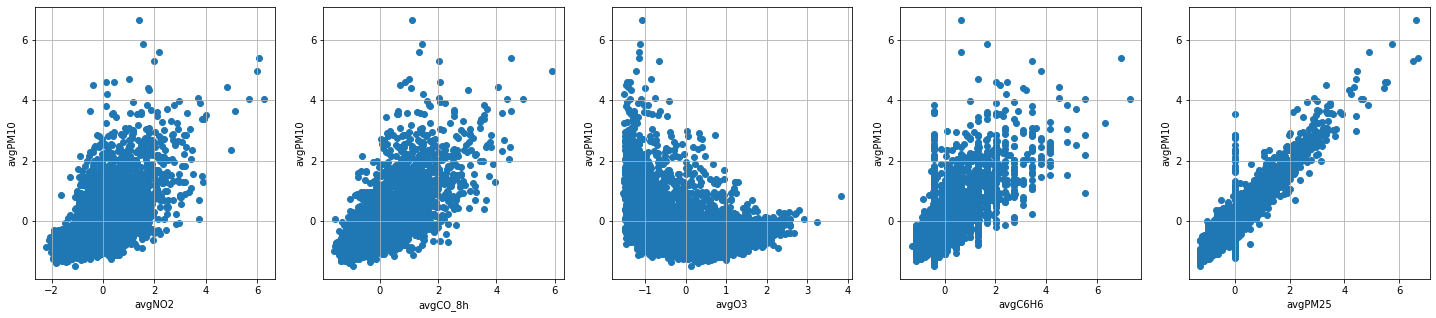

In [15]:
standardized_avgPM10 = preprocessing.scale(Tutti[["avgPM10"]])
standardized_avgNO2 = preprocessing.scale(Tutti[["avgNO2"]])
standardized_avgCO_8h = preprocessing.scale(Tutti[["avgCO_8h"]])
standardized_avgO3 = preprocessing.scale(Tutti[["avgO3"]])
standardized_avgC6H6 = preprocessing.scale(Tutti[["avgC6H6"]])
standardized_avgPM25 = preprocessing.scale(Tutti[["avgPM25"]])


plt.figure(figsize=(25,5))
plt.subplot(151)
plt.ylabel('avgPM10')
plt.xlabel('avgNO2')
plt.grid(True)
plt.scatter(standardized_avgNO2,standardized_avgPM10)
plt.subplot(152)
plt.ylabel('avgPM10')
plt.xlabel('avgCO_8h')
plt.grid(True)
plt.scatter(standardized_avgCO_8h,standardized_avgPM10)
plt.subplot(153)
plt.ylabel('avgPM10')
plt.xlabel('avgO3')
plt.grid(True)
plt.scatter(standardized_avgO3,standardized_avgPM10)
plt.subplot(154)
plt.ylabel('avgPM10')
plt.xlabel('avgC6H6')
plt.grid(True)
plt.scatter(standardized_avgC6H6,standardized_avgPM10)
plt.subplot(155)
plt.ylabel('avgPM10')
plt.xlabel('avgPM25')
plt.grid(True)
plt.scatter(standardized_avgPM25,standardized_avgPM10)
plt.show()


## Scatter plot tra O3 e gli altri inquinanti
Valutiamo O3 perché è l'unica feature che ha una stagionalità inversa rispetto alle altre. Notiamo come ci sia una leggera variazione con la correlazione con NO2.

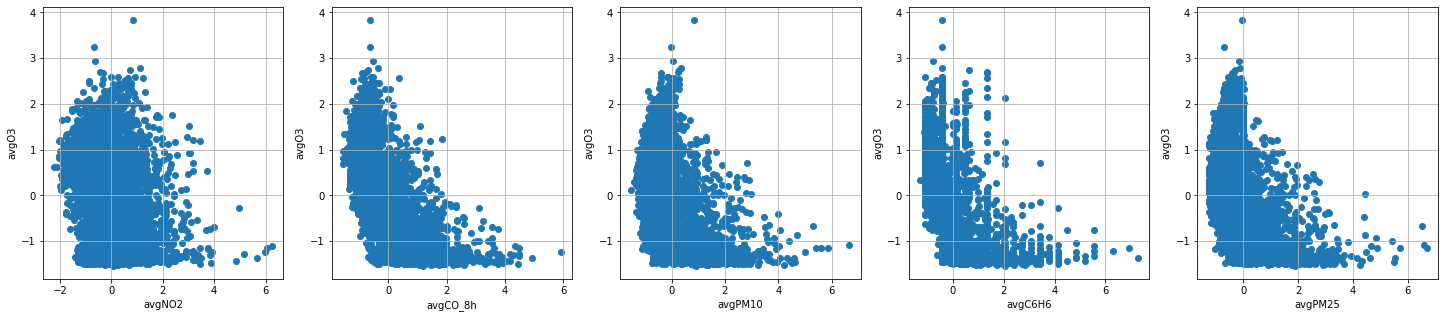

In [16]:
plt.figure(figsize=(25,5))
plt.subplot(151)
plt.ylabel('avgO3')
plt.xlabel('avgNO2')
plt.grid(True)
plt.scatter(standardized_avgNO2,standardized_avgO3)
plt.subplot(152)
plt.ylabel('avgO3')
plt.xlabel('avgCO_8h')
plt.grid(True)
plt.scatter(standardized_avgCO_8h,standardized_avgO3)
plt.subplot(153)
plt.ylabel('avgO3')
plt.xlabel('avgPM10')
plt.grid(True)
plt.scatter(standardized_avgPM10,standardized_avgO3)
plt.subplot(154)
plt.ylabel('avgO3')
plt.xlabel('avgC6H6')
plt.grid(True)
plt.scatter(standardized_avgC6H6,standardized_avgO3)
plt.subplot(155)
plt.ylabel('avgO3')
plt.xlabel('avgPM25')
plt.grid(True)
plt.scatter(standardized_avgPM25,standardized_avgO3)
plt.show()


## Classificatore
Prendiamo le feature scelte, ovvero PM10 e O3, successivamente si divide il dataset in due parte: una di addestramento e una di valutazione.

In [17]:
X = Tutti[["avgPM10", "avgO3"]].values
Y = Tutti['Valutazione'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
print(Y_test)
print(Y_train)

[1 0 0 ... 0 1 1]
[1 1 1 ... 1 1 1]


In seguito standardizziamo le due parti.

In [18]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Utilizziamo la regressione logistica perché la nostra variabile dipendente è di tipo dicotomico (ovvero può assumere solo due valori):

In [19]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Utilizziamo invece il test a due metriche per stabilire quanto è accurato il modello che stiamo usando:

In [20]:
Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: " + str(round(accuracy_score(Y_test, Y_pred) * 100, 2)) + "%")
print("LOG LOSS: " + str(round(log_loss(Y_test, Y_pred_proba) * 100, 2)) + "%")

ACCURACY: 94.2%
LOG LOSS: 14.22%


Infine creiamo una funzione showBound: essa crea uno scatterplot con gli esempi corrispondenti a Bad Air (in rosso). Poi crea uno scatterplot con gli esempi corrispondenti a Good Air (in blu). Successivamente esegue una predizione per ogni punto del grafico, ricordando che nel grafico sono presenti O3 e PM10 messi in relazione con la valutazione. Se il punto viene classificato come Bad Air allora lo colora di rosso, se invece viene classificato come Good Air lo colora di blu, il confine che separa i due colori è il decision boundary.

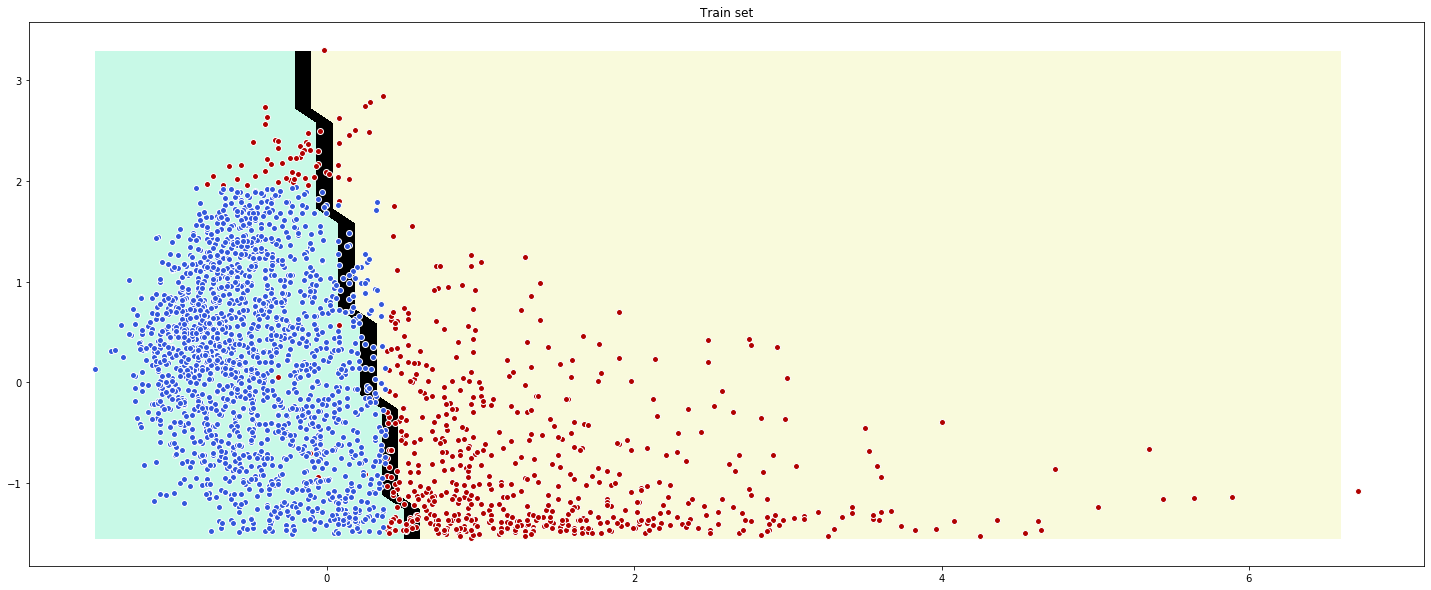

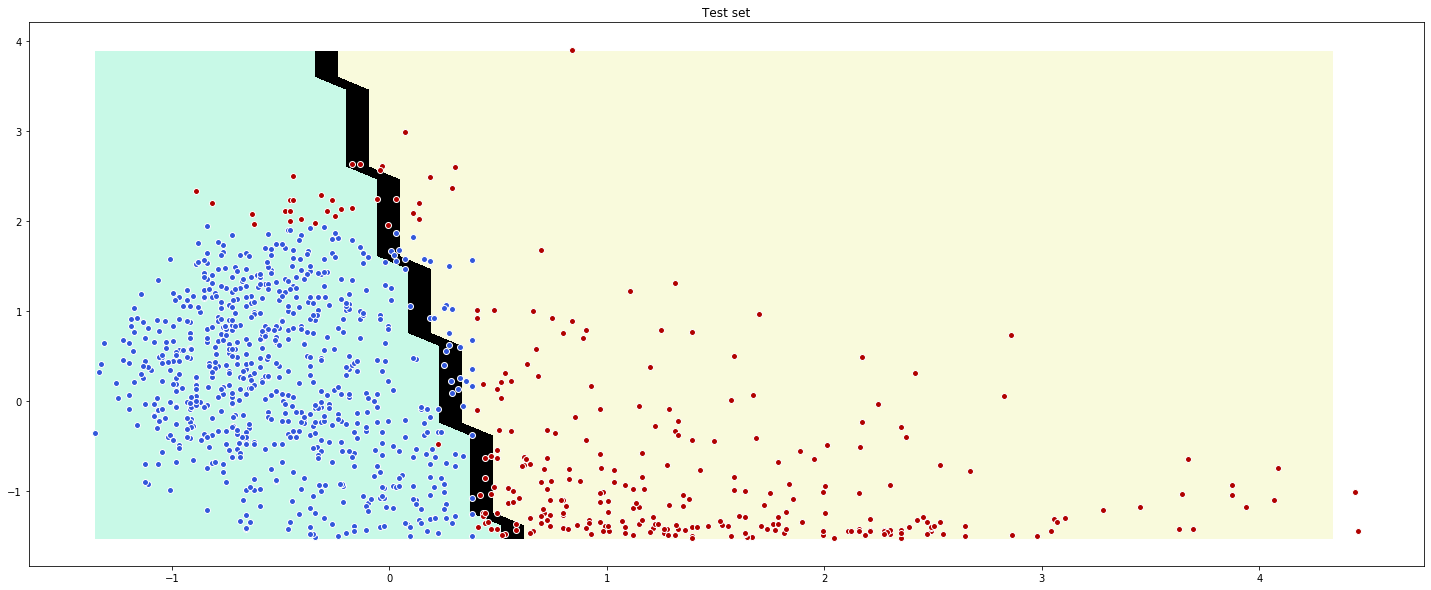

In [22]:
def showBounds(X,Y,model,title=None):
    
    plt.figure(figsize=(25,10))
    h = 0.1422

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, colors=['#000000'], extend='both')
    cs.cmap.set_over('#C8F9E7')
    cs.cmap.set_under('#F9FADC')
    cs.changed()

    X_G = X[Y==1]
    X_B = X[Y==0]
    plt.title(title)
    plt.scatter(X_B[:, 0], X_B[:, 1], c="#B00100",  edgecolor='white')
    plt.scatter(X_G[:, 0], X_G[:, 1], c="#3358DB",  edgecolor='white')
    plt.show()
    
showBounds(X_train, Y_train, lr, title="Train set")
showBounds(X_test, Y_test, lr, title="Test set")